<center>
    <img src="https://i.pinimg.com/originals/16/6b/4b/166b4b9a6db1bc18d0535864982ab055.png" width=500 height=500>
</center>

<br>
<hr>

<h2 style="background-color:#ff671c;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 20px;color:#ffffff">Business Problem</h2>

<center><b>
FLO(a shoe store), wants to segment its customers and determine marketing strategies according to these segments. To this end, the behaviors of the customers will be defined and groups will be formed according to the clusters in these behaviors.</b></center>
    
<br>
    
<h2 style="background-color:#ff671c;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 20px;color:#ffffff">Background of Dataset</h2>

<center><b>
The dataset consists of the information obtained from the past shopping behaviors of customers who made their last purchases from Flo as OmniChannel (both online and offline shopper) in the years 2020-2021.
 </b></center>
 
 <br>

**master_id** : Unique Customer Number<br>
**order_channel** : Which channel of the shopping platform is used (Android, IOS, Desktop, Mobile)<br>
**last_order_channel** : The channel where the most recent purchase was made<br>
**first_order_date** : Date of the customer's first purchase<br>
**last_order_channel** : Customer's previous shopping history<br>
**last_order_date_offline** : The date of the last purchase made by the customer on the offline platform<br>
**order_num_total_ever_online** : Total number of purchases(order) made by the customer on the online platform<br>
**order_num_total_ever_offline** : Total number of purchases(order) made by the customer on the offline platform<br>
**customer_value_total_ever_offline** : Total paid for the customer's offline purchases<br>
**customer_value_total_ever_online** : Total paid for the customer's online purchases<br>
**interested_in_categories_12** : List of categories the customer has shopped in the last 12 months<br>

<br><br>
<hr>

<br>
<h2 style="background-color:#ff671c;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 20px;color:#ffffff">Import Process</h2>

In [1]:
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import random
import collections
import string
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_period_transactions
from lifetimes import GammaGammaFitter

sns.set_palette("viridis")


In [3]:
data = pd.read_csv("../input/flo-data-20k/flo_data_20k.csv")
df = data.copy()

In [4]:
def ExploreDataset(df):
    print(f"""
    -- Dataset Columns --
    
    {df.columns.tolist()}
    
    -- Dataset Shape --
    
    {df.shape}
    
    -- Is There Any NaN Values? --
    
    {df.isna().values.any()}
    
    -- Dataset Columns' Dtypes --
    
    {df.dtypes}
    
    -- Dataset First 5 Observation --
    
    """)
    
    return df.head()

In [5]:
ExploreDataset(df)


    -- Dataset Columns --
    
    ['master_id', 'order_channel', 'last_order_channel', 'first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline', 'order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'interested_in_categories_12']
    
    -- Dataset Shape --
    
    (19945, 12)
    
    -- Is There Any NaN Values? --
    
    False
    
    -- Dataset Columns' Dtypes --
    
    master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
inte

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


<br>
<h2 style="background-color:#ff671c;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 20px;color:#ffffff">Data Preprocessing</h2>

In [6]:
# type conversion

df['first_order_date'] = pd.to_datetime(df['first_order_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])
df['last_order_date_online'] = pd.to_datetime(df['last_order_date_online'])
df['last_order_date_offline'] = pd.to_datetime(df['last_order_date_offline'])

In [7]:
# new features

df["Total_Order"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["Total_Payment"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

<h2 style="background-color:#ff671c;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 20px;color:#ffffff">Highlight Actions </h2>

In [8]:
def HighlightActions(df,highlight_level=5):
    order_df = df[["master_id","Total_Order"]].sort_values(by="Total_Order",ascending=False)[:highlight_level]
    payment_df = df[["master_id","Total_Payment"]].sort_values(by="Total_Payment",ascending=False)[:highlight_level]

    result = {}
    result["Highlight_Order"] = order_df.values.tolist()
    result["Highlight_Payment"] = payment_df.values.tolist()

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Initial Pokemon - 1st Generation')


    sns.barplot(ax=axes[0], x=np.arange(1,highlight_level+1), y=order_df["Total_Order"].values)
    axes[0].set_title('Highlight: Order')

    sns.barplot(ax=axes[1], x=np.arange(1,highlight_level+1), y=payment_df["Total_Payment"].values)
    axes[1].set_title('Highlight: Payment')

    
    return result

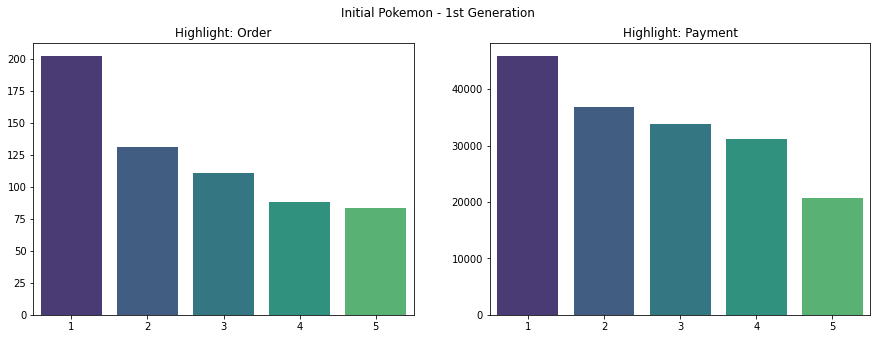

In [9]:
HighlightActions_result = HighlightActions(df)

In [10]:
# for results;

HighlightActions_result

{'Highlight_Order': [['5d1c466a-9cfd-11e9-9897-000d3a38a36f', 202.0],
  ['cba59206-9dd1-11e9-9897-000d3a38a36f', 131.0],
  ['a57f4302-b1a8-11e9-89fa-000d3a38a36f', 111.0],
  ['fdbe8304-a7ab-11e9-a2fc-000d3a38a36f', 88.0],
  ['329968c6-a0e2-11e9-a2fc-000d3a38a36f', 83.0]],
 'Highlight_Payment': [['5d1c466a-9cfd-11e9-9897-000d3a38a36f', 45905.1],
  ['d5ef8058-a5c6-11e9-a2fc-000d3a38a36f', 36818.29],
  ['73fd19aa-9e37-11e9-9897-000d3a38a36f', 33918.1],
  ['7137a5c0-7aad-11ea-8f20-000d3a38a36f', 31227.41],
  ['47a642fe-975b-11eb-8c2a-000d3a38a36f', 20706.34]]}

<br>
<h2 style="background-color:#ff671c;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 20px;color:#ffffff">RFM</h2>

In [11]:
def RFM(df,return_segment=None):
    analyze_date = df.last_order_date.max() + dt.timedelta(days=2)
    rfm_df = df.groupby("master_id").agg({"last_order_date": lambda date: (analyze_date - date.max()).days,
                                   "Total_Order" : lambda Total_Order:Total_Order,
                                   "Total_Payment": lambda Total_Payment: Total_Payment.sum()})
    rfm_df.columns = ["recency","frequency","monetary"]
    rfm_df = rfm_df[rfm_df.monetary > 0]
    rfm_df["recency_score"] = pd.qcut(rfm_df['recency'],5,labels=[5,4,3,2,1])
    rfm_df["monetary_score"] = pd.qcut(rfm_df['monetary'],5,labels=[1,2,3,4,5])
    rfm_df["frequency_score"] = pd.qcut(rfm_df['frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
    rfm_df["RF_SCORE"] = rfm_df.recency_score.astype(str) + rfm_df.frequency_score.astype(str)


    seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'}
    rfm_df["segment"] = rfm_df.RF_SCORE.replace(seg_map,regex=True)
    
    if return_segment != None:
        segment = {}
        for i in return_segment:
            segment[i+"_id"] = rfm_df[rfm_df.segment == i].index.tolist()
            return rfm_df,segment
    
    else:
        return rfm_df

In [12]:
rfm_df,attention_users = RFM(df,return_segment=["champions","need_attention"])

In [13]:
rfm_df.head()

,recency,frequency,monetary,recency_score,monetary_score,frequency_score,RF_SCORE,segment
master_id,,,,,,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4,54,champions
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,1,2,12,hibernating
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,4,3,23,at_Risk
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4,54,champions
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,5,4,54,champions


In [14]:
# attention users for given params 
attention_users

{'champions_id': ['00016786-2f5a-11ea-bb80-000d3a38a36f',
  '000c1fe2-a8b7-11ea-8479-000d3a38a36f',
  '000f5e3e-9dde-11ea-80cd-000d3a38a36f',
  '004d5204-2037-11ea-87bf-000d3a38a36f',
  '0067708e-1ec6-11ea-aa32-000d3a38a36f',
  '00736820-a834-11e9-a2fc-000d3a38a36f',
  '009e2910-1252-11ea-a001-000d3a38a36f',
  '00b3ee24-aa44-11e9-a2fc-000d3a38a36f',
  '00cf8494-9da2-11e9-9897-000d3a38a36f',
  '0104f00a-4cb8-11ea-a626-000d3a38a36f',
  '0151bbee-a7de-11e9-a2fc-000d3a38a36f',
  '016521aa-aa88-11e9-a2fc-000d3a38a36f',
  '0192727e-2bd7-11ea-91ab-000d3a38a36f',
  '01949f34-8633-11ea-be76-000d3a38a36f',
  '01ca955c-a106-11e9-a2fc-000d3a38a36f',
  '020fdc82-a8d3-11e9-a2fc-000d3a38a36f',
  '0225e986-2b15-11ea-9d27-000d3a38a36f',
  '024da65a-5b36-11ea-b7e2-000d3a38a36f',
  '025b8bb6-ac28-11e9-a2fc-000d3a38a36f',
  '02a5bc6c-d663-11e9-93bc-000d3a38a36f',
  '02dad82c-abaa-11e9-a2fc-000d3a38a36f',
  '02e3c7d4-ac63-11e9-a2fc-000d3a38a36f',
  '0365d12c-ac1b-11e9-a2fc-000d3a38a36f',
  '036b17de-a9ca-1

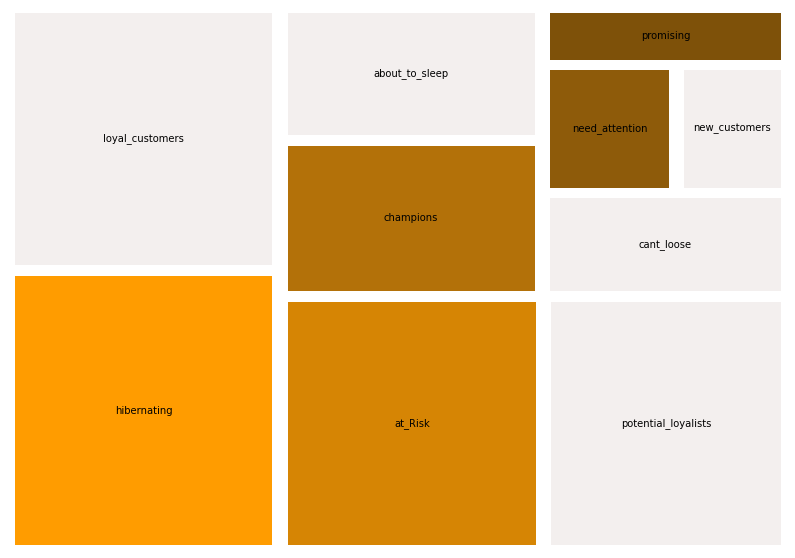

In [15]:
import matplotlib
rfm_df.reset_index(inplace=True)
sq1 = rfm_df.groupby("segment")["master_id"].nunique().sort_values(ascending=False).reset_index()
cmap = matplotlib.cm.coolwarm
mini = min(sq1["master_id"])
maxi = max(sq1["master_id"])
norm = matplotlib.colors.Normalize(vmin=mini,vmax=maxi)
colors = ["#ff9c00","#F3EFEE","#d68504","#F3EFEE","#b37109","#F3EFEE","#F3EFEE","#8e5b0a","#F3EFEE","#7e5109"]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14,10)
squarify.plot(sizes=sq1["master_id"],
             label = sq1.segment,
             alpha=1,pad=True,
             color=colors)

plt.axis("off")
plt.show()

<br>
<h2 style="background-color:#ff671c;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 20px;color:#ffffff">CLTV</h2>
<center><b>Prediction with BG/NBD + Gamma-Gamma</b></center>

In [16]:
def CLTV(df,
         cltv_time=6,
         cltv_discount_rate=0.01,
         weekly_best_purchaser=True):
    
    
    analyze_date = df.last_order_date.max() + dt.timedelta(days=2)
    
    cltv_df = pd.DataFrame({"customer_id": df["master_id"],
             "recency_weekly": ((df["last_order_date"] - df["first_order_date"]).dt.days)/7,
             "t_weekly": ((analyze_date - df["first_order_date"]).astype('timedelta64[D]'))/7,
             "frequency": df["Total_Order"],
             "monetary_cltv_avg": df["Total_Payment"] / df["Total_Order"]})
    
    bgf = BetaGeoFitter(penalizer_coef=0.001)
    bgf.fit(cltv_df['frequency'],cltv_df['recency_weekly'],cltv_df['t_weekly'])
    cltv_df["exp_sales_3_month"] = bgf.predict(4 * 3,cltv_df['frequency'],cltv_df['recency_weekly'],cltv_df['t_weekly'])
    cltv_df["exp_sales_6_month"] = bgf.predict(4 * 6,cltv_df['frequency'],cltv_df['recency_weekly'],cltv_df['t_weekly'])
    
    plot_period_transactions(bgf)
    plt.show()
    
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])
    cltv_df['exp_average_value'] = ggf.conditional_expected_average_profit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])
    
    cltv_df["CLTV"] = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency_weekly'],
                                   cltv_df['t_weekly'],
                                   cltv_df['monetary_cltv_avg'],
                                   time=cltv_time, 
                                   freq="W", 
                                   discount_rate=cltv_discount_rate) 

    cltv_df["segment"] = pd.qcut(cltv_df["CLTV"], 4, labels=["D", "C", "B", "A"])
    
    if weekly_best_purchaser:
        bgf.conditional_expected_number_of_purchases_up_to_time(1,cltv_df['frequency'],cltv_df['recency_weekly'],cltv_df['t_weekly']).sort_values(ascending=False).head(10)
        best_purchaser = bgf.predict(1,cltv_df['frequency'],cltv_df['recency_weekly'],cltv_df['t_weekly']).sort_values(ascending=False).head(10)    
        return cltv_df, best_purchaser
    
    else:
        return cltv_df

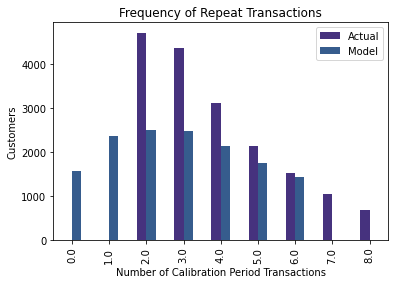

In [17]:
cltv_df,weekly_best_purchaser = CLTV(df,weekly_best_purchaser=True)

In [18]:
# Who are the 10 customers we expect the most to purchase in 1 week?

cltv_df.iloc[weekly_best_purchaser.index]

,customer_id,recency_weekly,t_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,CLTV,segment
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.714286,67.285714,70.0,263.479571,6.349962,12.699905,264.019264,3518.063500,A
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,111.571429,119.714286,83.0,51.088675,5.424987,10.849963,51.216562,583.050651,A
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,394.000000,398.571429,202.0,227.252970,5.244657,10.489310,227.416863,2502.863834,A
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,104.428571,120.142857,77.0,67.325325,5.035152,10.070292,67.490155,713.099488,A
14402,03f502d4-a559-11e9-a2fc-000d3a38a36f,104.714286,118.714286,61.0,45.220820,4.065874,8.131740,45.382623,387.204758,A
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,133.142857,147.142857,68.0,541.445441,3.921505,7.843002,542.523810,4464.458196,A
8043,4a51668a-a155-11e9-a2fc-000d3a38a36f,87.142857,98.857143,51.0,86.154118,3.835726,7.671443,86.450435,695.843950,A
15611,4a7e875e-e6ce-11ea-8f44-000d3a38a36f,39.714286,40.000000,29.0,165.297586,3.493173,6.986332,166.169593,1218.059072,A
18067,695889b4-d6ed-11e9-93bc-000d3a38a36f,91.857143,103.857143,47.0,175.458085,3.452815,6.905622,176.022893,1275.379914,A
8328,1902bf80-0035-11eb-8341-000d3a38a36f,28.857143,33.285714,25.0,97.439600,3.259070,6.518127,98.103588,670.927000,A


In [19]:
cltv_df.groupby("segment")[["exp_sales_3_month","exp_sales_6_month","exp_average_value","CLTV"]].agg({"mean","sum"}).T

segment                             D              C              B  \
exp_sales_3_month sum     2026.432952    2621.622128    3016.450072   
                  mean       0.406343       0.525797       0.604984   
exp_sales_6_month sum     4052.856765    5243.231784    6032.885762   
                  mean       0.812684       1.051591       1.209965   
exp_average_value sum   493839.610693  661063.650415  836803.644469   
                  mean      99.025388     132.583965     167.830655   
CLTV              sum   398990.552339  690508.392017  999252.578979   
                  mean      80.006126     138.489449     200.411668   

segment                            A  
exp_sales_3_month sum   3.944443e+03  
                  mean  7.911037e-01  
exp_sales_6_month sum   7.888867e+03  
                  mean  1.582204e+00  
exp_average_value sum   1.190436e+06  
                  mean  2.387558e+02  
CLTV              sum   1.857360e+06  
                  mean  3.725150e+02

<br>
<h2 style="background-color:#ff671c;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 20px;color:#ffffff">Possible Real Life Company Scenarios</h2>


<h3 style="background-color:#ff671c;font-family:newtimeroman;font-size:175%;text-align:left;border-radius: 10px 10px;color:#ffffff">-- CASE 1</h3>

**The company wants to organize a special campaign for rarely used order channels. A special campaign code should be created for the 2 least used order channels.**

In [20]:
campaign_channels = df.order_channel.value_counts().sort_values()[:2].index.to_list()
for i in campaign_channels:
    print("CAMPAIGN CODE for",i,"=",i.replace(" ","")+"_"+"".join(random.choice(string.ascii_letters) for i in range(5)))

CAMPAIGN CODE for Desktop = Desktop_xzNKf
CAMPAIGN CODE for Ios App = IosApp_DAvlz


<h3 style="background-color:#ff671c;font-family:newtimeroman;font-size:175%;text-align:left;border-radius: 10px 10px;color:#ffffff">-- CASE 2</h3>

**The company wants to generate special campaign codes for its customers in certain categories and certain segments. Wants an automated campaign creation function.**

In [21]:
def CampaignCreator(target_segment,
                    target_category,
                    campaign_code=bool,
                    only_customerid=bool):
    
    global rfm_df
    
    if campaign_code:
        print("CAMPAIGN CODE for",target_segment,target_category,"=",target_category.replace(" ","")+"_"+"".join(random.choice(string.ascii_letters) for i in range(5)),"\n")

    merged_df = pd.merge(rfm_df[rfm_df.segment==target_segment][["segment","master_id"]],(df[df.interested_in_categories_12.str.contains(target_category)]),on="master_id")
    
    if only_customerid:
        return merged_df["master_id"]
    else:
        return merged_df

In [22]:
CampaignCreator(target_category="KADIN",
                target_segment="champions",
                campaign_code=True,
                only_customerid=True)

CAMPAIGN CODE for champions KADIN = KADIN_HFyVZ 



0      000c1fe2-a8b7-11ea-8479-000d3a38a36f
1      00b3ee24-aa44-11e9-a2fc-000d3a38a36f
2      00cf8494-9da2-11e9-9897-000d3a38a36f
3      024da65a-5b36-11ea-b7e2-000d3a38a36f
4      02a5bc6c-d663-11e9-93bc-000d3a38a36f
                       ...                 
891    fd9e0aca-b0a7-11e9-9757-000d3a38a36f
892    fe3278f6-5be0-11ea-82b1-000d3a38a36f
893    ff0c5be4-d6c4-11e9-93bc-000d3a38a36f
894    ff3414d8-53c7-11ea-abe0-000d3a38a36f
895    ffdd5eb8-aee9-11e9-a2fc-000d3a38a36f
Name: master_id, Length: 896, dtype: object

<h3 style="background-color:#ff671c;font-family:newtimeroman;font-size:175%;text-align:left;border-radius: 10px 10px;color:#ffffff">-- CASE 3</h3>

**The company wants to know which categories have received interest in the last 12 months and which categories have earned the most.**

In [23]:
def CategoriesFunction(x):
    x=x.replace("[","")
    x=x.replace("]","")
    x=x.split(", ")
    return x

In [24]:
categories_list = df.interested_in_categories_12.apply(CategoriesFunction)

In [25]:
product_categories = {}
for i in categories_list:
    for j in i:
        if j not in product_categories.keys():
            product_categories[j] = 1
        else:
            product_categories[j] +=1

In [26]:
product_categories["Unkown"] = product_categories.pop("")
product_categories = collections.OrderedDict(sorted(product_categories.items(), key=lambda kv: kv[1]))

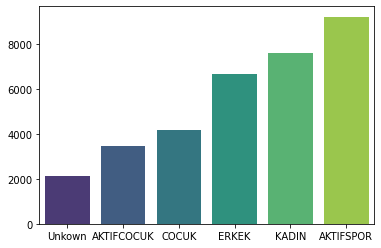

In [27]:
sns.barplot(x=list(product_categories.keys()),y=list(product_categories.values()));

In [28]:
df.groupby("interested_in_categories_12")["Total_Payment"].sum().sort_values(ascending=False)[:5]

interested_in_categories_12
[AKTIFSPOR]           2373965.87
[KADIN]               1139066.02
[]                    1136553.55
[KADIN, AKTIFSPOR]    1132049.56
[ERKEK]               1106934.44
Name: Total_Payment, dtype: float64

<h3 style="background-color:#ff671c;font-family:newtimeroman;font-size:175%;text-align:left;border-radius: 10px 10px;color:#ffffff">-- CASE 4</h3>

**The company wants to calculate how much on average it earns per product from online and offline shopping.**

In [29]:
print(f"""
Online: {(df["customer_value_total_ever_online"] / df["order_num_total_ever_online"]).mean()}
Offline: {(df["customer_value_total_ever_offline"] / df["order_num_total_ever_offline"]).mean()}
""")


Online: 165.9289216098459
Offline: 135.7509556651877



<br> <hr>
<h2 style="background-color:#ff671c;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 20px 20px;color:#ffffff">Thank You :)</h2>
